# <center> Book Recommendations System - Data Cleaning and Exploration</center>
#### <center>**By: Mili Ketan Thakrar**</center>

<a id="TOC"></a> <br>
## Table of Contents
1. [Introduction](#intro)
2. [Data Dictionary](#data-dictionary)
3. [Loading the Datasets and Libraries](#loading-datasets)
4. [Exploring and Cleaning Datasets](#exploring-datasets)
    1. [Books Data](#books-data)
    2. [Ratings Data](#ratings-data)
    3. [Methodology](#merging-datasets)
    4. [Users Data](#users-data)
5. [Final Dataset Analysis](#final-dataset)
6. [Additional Insights and Observations](#insights)
    1. [Distribution of Average Book Ratings](#avg)
    2. [Top 10 Countries by User Count and Age breakdown](#top10)
    3. [Distribution of Users Across Age Categories](#age)
    4. [Top 10 Books by Total Number of Ratings](#top)
7. [Conclusion and Next Steps](#conclusion)

<a id="intro"></a>
## Introduction
[Back to Table of Contents](#table-of-content)

**Laying the Foundation for Our Book Recommendation System**

This initial sprint focuses on data exploration and preparation, a crucial step in building our personalized book recommendation system. Our project utilizes three primary datasets: books, user ratings, and user demographics. The main goal is to thoroughly understand, clean, and integrate these datasets into a comprehensive, analysis-ready format.

We will explore each dataset's structure and content, uncovering patterns and identifying potential issues. Our data cleaning efforts will address missing values, duplicates, and inconsistencies across all three datasets. We'll then merge these cleaned datasets into a single, comprehensive dataset that combines book information, user ratings, and demographic data.

By the end of this sprint, we expect to have a unified, clean dataset ready for advanced analysis. Our report will detail our findings, including statistics and visualizations of key distributions across books, ratings, and user characteristics. This refined, integrated dataset and the insights gained will guide our modeling approach in subsequent sprints, laying a solid groundwork for developing effective book recommendations.

Let's begin by looking at our data dictionaries and then dive into each dataset.

<a id="data-dictionary"></a>
## Data Dictionary
[Back to Table of Contents](#table-of-content)

Below we have the data dictioonary of the intial data and the final combined dataset

#### Books Table

| Field Name | Type | Description |
|------------|------|-------------|
| ISBN | string | International Standard Book Number, unique identifier for books |
| Title | string | The title of the book |
| Author | string | The name of the book's author |
| Publisher | string | The name of the book's publisher |
| Publication_year | int | The year the book was published |
| Image_URL | string | URL link to the book's cover image |

#### Ratings Table

| Field Name | Type | Description |
|------------|------|-------------|
| User_id | float | Unique identifier for each user |
| ISBN | string | International Standard Book Number of the rated book |
| Ratings | float | User's rating of the book, scale of 1-10 |

#### Users Table

| Field Name | Type | Description |
|------------|------|-------------|
| User_id | float | Unique identifier for each user |
| Age | float | Age of the user |
| Location | string | Location where the user is located |

#### Final Table

| Field Name | Type | Description |
|------------|------|-------------|
| ISBN | string | International Standard Book Number, unique identifier for books |
| Title | string | The title of the book |
| Author | string | The name of the book's author |
| Ratings | float | User's rating of the book, scale of 1-10 |
| Total_num_of_ratings | float | Total number of ratings for the book |
| Avg_ratings | float | Average rating score for the book |
| Publisher | string | The name of the book's publisher |
| Publication_year | int | The year the book was published |
| Year_Category | string | Categorized time period of publication |
| User_id | float | Unique identifier for each user |
| Age | float | Age of the user |
| Age_Category | string | Categorized Age into age ranges|
| City | string | City where the user is located |
| State | string | State or region where the user is located |
| Country | string | Country where the user is located |
| Image_URL | string | URL link to the book's cover image |


<a id="loading-datasets"></a>
## Loading the Datasets and Libaries  
[Back to Table of Contents](#table-of-content)

#### Required libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **Seaborn**: Advanced statistical plotting library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


**Loading the csv files**

In [2]:
books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')
users_df = pd.read_csv('Users.csv')

/var/folders/x1/c4vgz1153nb7vn8f6v942wl80000gn/T/ipykernel_58560/3577759053.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [3]:
# Quick overview of the data we have loaded above 
n_ratings = len(ratings_df)
n_books = books_df['ISBN'].nunique()
n_users = ratings_df['User-ID'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique books: {n_books}')
print(f'Number of unique users: {n_users}')
print(f'Average number of ratings per user: {round(n_ratings/n_users, 2)}')
print(f'Average number of ratings per book: {round(n_ratings/n_books, 2)}')

Number of ratings: 1149780
Number of unique books: 271360
Number of unique users: 105283
Average number of ratings per user: 10.92
Average number of ratings per book: 4.24


<a id="exploring-datasets"></a>
## Exploring and Cleaning Datasets 

<a id="books-data"></a>
### Books Data
[Back to Table of Contents](#table-of-content)

In [4]:
# Looking into the first 5 rows of the dataset
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Looking at the shape of the books data
books_df.shape
print(f"We have {books_df.shape[0]} rows and {books_df.shape[1]} columns in the books dataset")

We have 271360 rows and 8 columns in the books dataset


In [6]:
# lookign at what columsn the books data has 
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
# Seeing if the books data has any duplicated rows 
books_df.duplicated().sum()

np.int64(0)

In [8]:
# Dropping redundant columns 
books_df.drop(columns=['Image-URL-S', 'Image-URL-M'], inplace=True)

Here we are dropping the redundant columns in the books data as we have 3 columns that have images, this column will be useful for when we want to build our website or webpage to showcase our recommendations model, but will do not need all the image columns

In [9]:
# Renaming columns
books_df.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author', 
                         'Year-Of-Publication': 'Publication_year', 'Image-URL-L': 'Image_URL'}, inplace=True)

In [10]:
# Looking to see what eachg columns type is and the non-null counts
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271360 non-null  object
 1   Title             271360 non-null  object
 2   Author            271358 non-null  object
 3   Publication_year  271360 non-null  object
 4   Publisher         271358 non-null  object
 5   Image_URL         271357 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


Here we can see that the publication year column is also a object column since this is a numeric column we will change this into an int type as we have year 0 in the publication year which can not be converted to datetime. We will be handeling this year 0 value later. converting this column to a numeric column will be helpful if we want to do any further analysis on this column

In [11]:
# Checking for unique values in the publication year
print(books_df['Publication_year'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

Here we can see that we have non-numeric values in this column so let's replace them with year 0 for now 

In [12]:
# Convert to numeric, replacing non-numeric values with NaN
books_df['Publication_year'] = pd.to_numeric(books_df['Publication_year'], errors='coerce')

# Replace 'DK Publishing Inc' and 'Gallimard' with 0
books_df['Publication_year'] = books_df['Publication_year'].replace({'DK Publishing Inc': 0, 'Gallimard': 0})

# Fill remaining NaN values with 0 and convert to int64
books_df['Publication_year'] = books_df['Publication_year'].fillna(0).astype('int64')

In [13]:
# checking to see that the column has been converted 
books_df.dtypes

ISBN                object
Title               object
Author              object
Publication_year     int64
Publisher           object
Image_URL           object
dtype: object

In [14]:
# Looking at the null values in the column to see which columns have the most null values
books_df.isnull().sum().sort_values(ascending=False)

Image_URL           3
Author              2
Publisher           2
ISBN                0
Title               0
Publication_year    0
dtype: int64

In [15]:
# Looking at the null values as a percentage of the total dataset 
((books_df.isna().sum()/books_df.shape[0])*100).sort_values(ascending=False)

Image_URL           0.001106
Author              0.000737
Publisher           0.000737
ISBN                0.000000
Title               0.000000
Publication_year    0.000000
dtype: float64

Given our large books dataset (271,360 rows) and the negligible percentage of null values, we've chosen to drop these rows. This simplifies preprocessing while maintaining data quality, as the minimal data loss won't significantly impact our analysis. This approach ensures a clean and complete dataset for subsequent modeling.

In [16]:
# dropping null values as they are such a small percentage of the books df 
books_df = books_df.dropna()

In [17]:
# Sanity check
((books_df.isna().sum()/books_df.shape[0])*100).sort_values(ascending=False)

ISBN                0.0
Title               0.0
Author              0.0
Publication_year    0.0
Publisher           0.0
Image_URL           0.0
dtype: float64

In [18]:
# Looking at some basic statistics for Publication Year
books_df['Publication_year'].describe()

count    271353.000000
mean       1959.760235
std         257.996082
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Publication_year, dtype: float64

The publication year column reveals significant outliers, with values ranging from 0 to 2050. To better understand the distribution and impact of these outliers, we'll examine the frequency distribution of publication years. This analysis will help us identify the extent of potentially incorrect data points and inform our decision on how to handle them in our preprocessing steps.

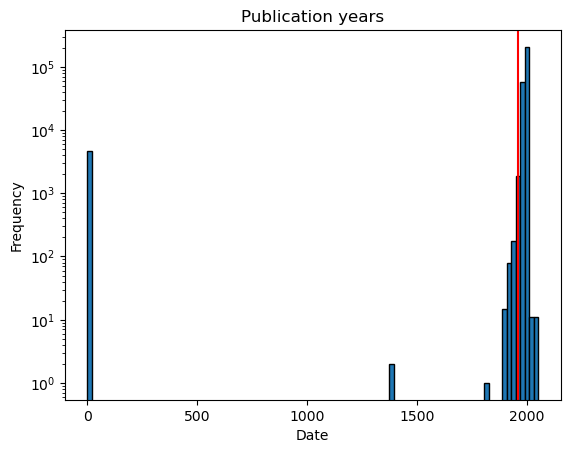

In [19]:
# Creating a histogram
books_df['Publication_year'].hist(bins=100, edgecolor='black', log=True)

# Customizing the plot
plt.title('Publication years')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.axvline(books_df['Publication_year'].mean(), color = "red", label='Mean')
plt.grid()

# Displaying the plot
plt.show()

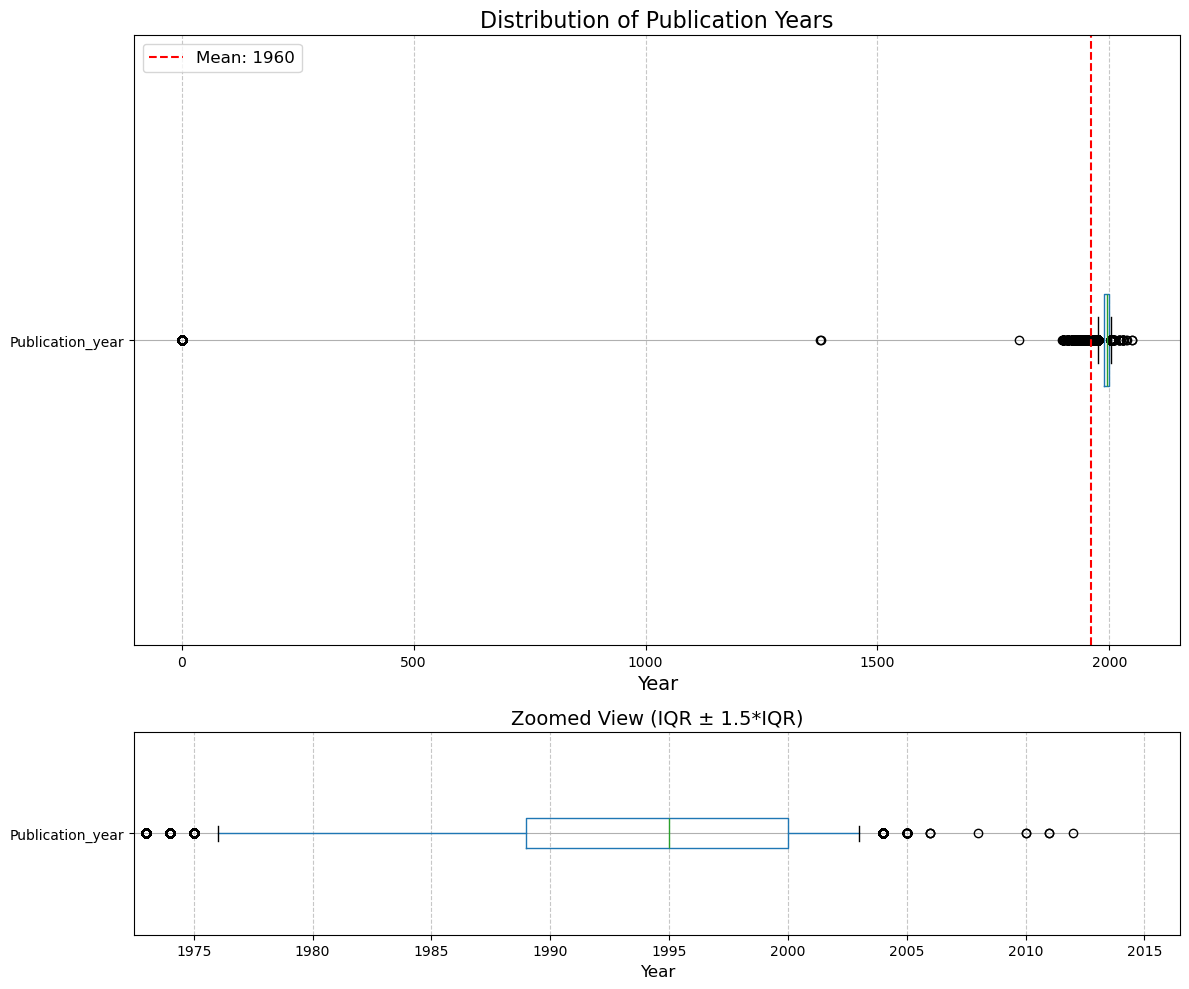

In [20]:
# Creating a larger figure for better visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# Main box plot
bp = books_df.boxplot(column='Publication_year', ax=ax1, vert=False, whis=[5, 95])
ax1.set_title('Distribution of Publication Years', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Adding mean line
mean_year = books_df['Publication_year'].mean()
ax1.axvline(mean_year, color='red', linestyle='--', label=f'Mean: {mean_year:.0f}')
ax1.legend(fontsize=12)

# Zooming in on the IQR
q1, q3 = books_df['Publication_year'].quantile([0.25, 0.75])
iqr = q3 - q1
zoom_min, zoom_max = q1 - 1.5*iqr, q3 + 1.5*iqr

books_df.boxplot(column='Publication_year', ax=ax2, vert=False, whis=[5, 95])
ax2.set_xlim(zoom_min, zoom_max)
ax2.set_title('Zoomed View (IQR ± 1.5*IQR)', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


The frequency distribution and boxplot analysis of the publication year reveal significant insights into our dataset's temporal structure. A notable concentration of outliers is observed, particularly at year 0, which likely represents missing or incorrectly entered data. The interquartile range (IQR) ± 1.5, spanning from 1975 to 2013, encompasses the majority of our data points, indicating that most books in our collection were published during this period.

Further examination through subplots, breaking down the frequency distribution across different time periods, corroborates these findings. It highlights the anomalous peak at year 0 while demonstrating that the bulk of publications fall within the 1900-2017 range. This distribution pattern suggests a need for careful data cleaning and potentially separate handling of the outlier years to ensure the integrity of our subsequent analyses and modeling efforts.

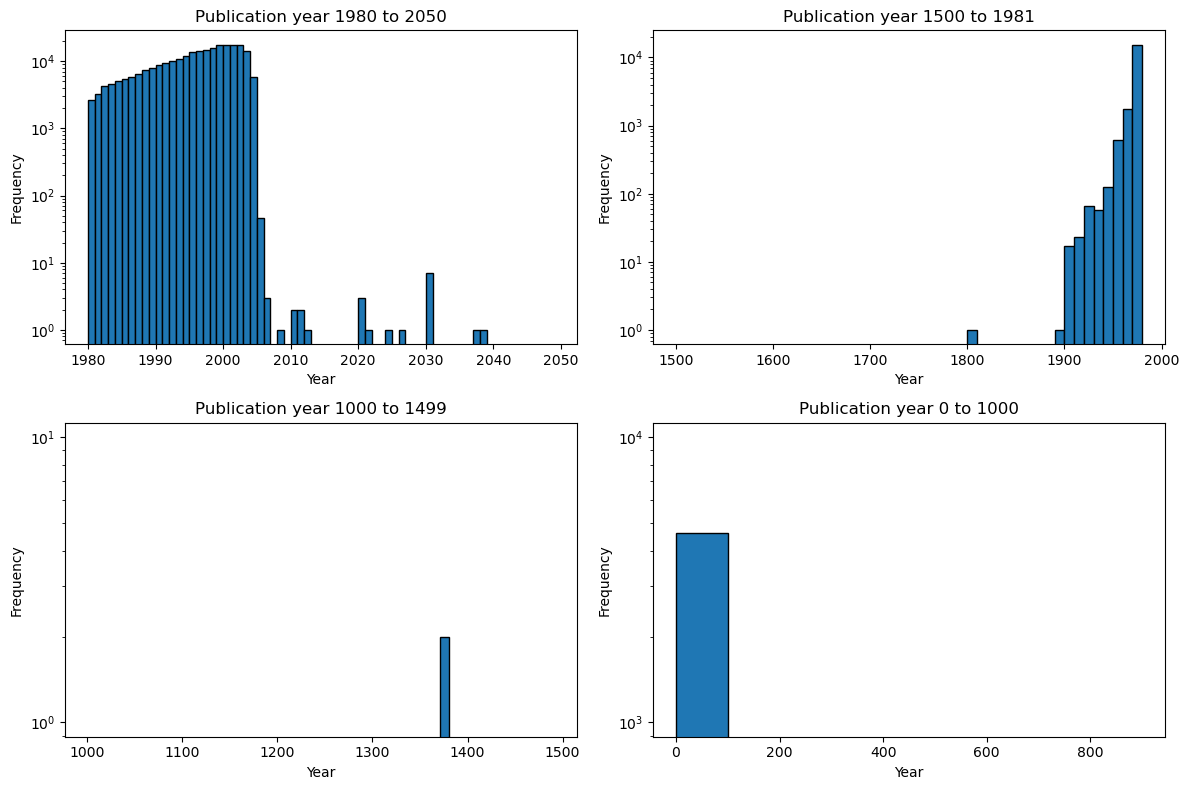

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Create subplots
ax = plt.subplot(2,2,1)
plt.hist(books_df['Publication_year'],bins=range(1980, 2050,1), edgecolor='black', log=True)
# Customize the plot
plt.title('Publication year 1980 to 2050')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Create subplots
ax = plt.subplot(2,2,2)
plt.hist(books_df['Publication_year'],bins=range(1500,1981,10), edgecolor='black', log=True)
# Customize the plot
plt.title('Publication year 1500 to 1981')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Create subplots
ax = plt.subplot(2,2,3)
plt.hist(books_df['Publication_year'],bins=range(1001,1499,10), edgecolor='black', log=True)
# Customize the plot
plt.title('Publication year 1000 to 1499')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Create subplots
ax = plt.subplot(2,2,4)
plt.hist(books_df['Publication_year'],bins=range(0,1000,100), edgecolor='black', log=True)
# Customize the plot
plt.title('Publication year 0 to 1000')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
# checking for unique values in publication year 
books_df['Publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

The analysis above reinforces our initial observations regarding the publication year data. The range spanning from 0 to 2050 clearly includes some misleading or inaccurate information. This wide spread, particularly the presence of years far into the future and the anomalous year 0, indicates potential data entry errors or placeholder values. To gain a more comprehensive understanding of these anomalies and their impact on our dataset, we'll need to conduct a more detailed investigation.

In [23]:
# Filtering the df for extreme values values 
df_filtered = books_df[(books_df['Publication_year'] >= 2020) | 
                 ((books_df['Publication_year'] >= 0) & (books_df['Publication_year'] <= 200))]

In [24]:
# Checkign for the number of unique book titles in this range 
df_filtered['Title'].nunique()

4489

In [25]:
# Checking the shaep of this datafreme that has the outliears 
df_filtered.shape

(4635, 6)

In [26]:
# filtering for rows with the publication year of 2020 and above 
new_df = df_filtered[(df_filtered['Publication_year'] > 2020)]

In [27]:
new_df

,ISBN,Title,Author,Publication_year,Publisher,Image_URL
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...
183769,0590085417,Heidi,Johanna Spyri,2021,Scholastic,http://images.amazon.com/images/P/0590085417.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...


In [28]:
# Seeing the unique years in this df 
new_df['Publication_year'].unique()

array([2030, 2050, 2038, 2026, 2021, 2024, 2037])

In [29]:
# Seeign the unique titles in this df 
new_df['Title'].unique()

array(['MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)',
       'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)',
       'Crossing America',
       "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)",
       'Outline of European Architecture (Pelican S.)',
       'Three Plays of Eugene Oneill',
       'Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.', 'Heidi',
       'Field Guide to the Birds of North America, 3rd Ed.',
       'FOREST PEOPLE (Touchstone Books (Hardcover))',
       'In Our Time: Stories (Scribner Classic)', 'CLOUT',
       'To Have and Have Not',
       'FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS'], dtype=object)

Our analysis reveals that only 7 unique publication years fall within the range of 2020-2050, representing a small subset of potentially erroneous entries. Given that books cannot have future publication dates, we can confidently identify these as incorrect data points. Further investigation into these specific titles confirms that their publication years are indeed inaccurate. Due to the limited number of affected entries, we have opted for a manual correction approach. This method allows us to precisely address these anomalies without risking broader data integrity. Below, we implement these targeted corrections to ensure the accuracy of our publication year data for subsequent analysis and modeling.

In [31]:
# Lists of titles and corresponding publication years
titles = [
    "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)",
    "MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)",
    "To Have and Have Not",
    'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)',
    'Outline of European Architecture (Pelican S.)',
    'Three Plays of Eugene Oneill',
    'Field Guide to the Birds of North America, 3rd Ed.',
    'FOREST PEOPLE (Touchstone Books (Hardcover))',
    'In Our Time: Stories (Scribner Classic)', 
    'CLOUT',
    'FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS'
]
publication_years = [1866, 1991, 1937, 1992, 1944, 1949, 1999, 1987, 1986, 2014, 1991]

# Update the DataFrame using a loop
for title, year in zip(titles, publication_years):
    books_df.loc[books_df['Title'] == title, 'Publication_year'] = year

Our manual investigation revealed that some book titles have publication years that are either incorrect or unable to be verified through online sources. These titles include entries with unusual or potentially erroneous data. Rather than removing these records entirely, we've decided to replace their publication years with 0. This approach allows us to retain these books in our dataset for other analyses while clearly marking their publication years as unreliable or unknown.

By setting these problematic publication years to 0, we maintain consistency with our earlier data cleaning steps. We will address all entries with a publication year of 0 in a subsequent processing step, ensuring a comprehensive approach to handling uncertain or inaccurate temporal data in our dataset.

In [32]:
# Titles to update
titles_to_update = [
    'Crossing America',
    'Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.',
    'Heidi'
]

# Replace publication year with 0 for these titles
books_df.loc[books_df['Title'].isin(titles_to_update), 'Publication_year'] = 0

In [33]:
# checking for unique values in publication year 
books_df['Publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 1866, 1934, 1910,
       1933, 1944, 1902, 1924, 1921, 1900, 1917, 1901, 2010, 1908, 1906,
       1935, 1806, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 2014,
       1376])

Now we can see that we do not have any anomolies for datas past 2020, now let's look into the outliers in the daat for dates from 0 - 1500

In [34]:
# Filtering the df for extreme values values 
df_old_years = df_filtered[(df_filtered['Publication_year'] >= 0) & (df_filtered['Publication_year'] <= 1500)]

In [35]:
df_old_years

,ISBN,Title,Author,Publication_year,Publisher,Image_URL
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...


Our analysis reveals a significant data quality issue: 4,618 rows have publication years ranging from 0 to 1500. While dropping these rows would result in substantial data loss, further investigation shows that many of these entries are simply incorrect. For instance, "The Postman's House" by Maggie Hemingway is listed with a publication year of 0, when it was actually published in 1992.

Given the large number of entries with year 0, manual correction is impractical. Instead, we'll adopt a more systematic approach to clean this data, making it more valuable and usable for our future modeling efforts without introducing errors or complications.

Our solution involves creating bins for the publication years. This strategy will allow us to categorize the problematic entries (including those with year 0) into an "unknown" category. This approach preserves the data while mitigating the impact of incorrect entries on our model. By implementing this binning method, we ensure that our dataset remains comprehensive while improving its overall reliability for subsequent analysis and model building.

In [36]:
# Defining bin edges based on the distribution of years
bins = [0, 1, 1900, 1950, 1980, 2000, 2010, np.inf]

# Defining labels for the bins
labels = ['Unknown', 'Pre-1900', '1900-1949', '1950-1979', '1980-1999', '2000-2009', '2010 onwards']

# Assuming your DataFrame is called 'df' and the column is 'Publication_year'
books_df['Year_Category'] = pd.cut(books_df['Publication_year'], bins=bins, labels=labels, include_lowest=True)

# Handling 0 values separately
books_df.loc[books_df['Publication_year'] == 0, 'Year_Category'] = 'Unknown'

In [37]:
# Rearranging the order of the columns 
books_df = books_df[['ISBN', 'Title', 'Author', 'Publisher', 'Publication_year', 'Year_Category', 'Image_URL']]

In [38]:
# Looking at the first 5 rows of the books daat once cleaned
books_df.head()

,ISBN,Title,Author,Publisher,Publication_year,Year_Category,Image_URL
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2002,2000-2009,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,2001,2000-2009,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,1991,1980-1999,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,1999,1980-1999,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,1999,1980-1999,http://images.amazon.com/images/P/0393045218.0...


In [39]:
# Value counts for the publiscation year category to see which bins have the highest count 
books_df['Year_Category'].value_counts()

Year_Category
1980-1999       193346
2000-2009        55231
1950-1979        17808
Unknown           4632
1900-1949          321
Pre-1900             8
2010 onwards         7
Name: count, dtype: int64

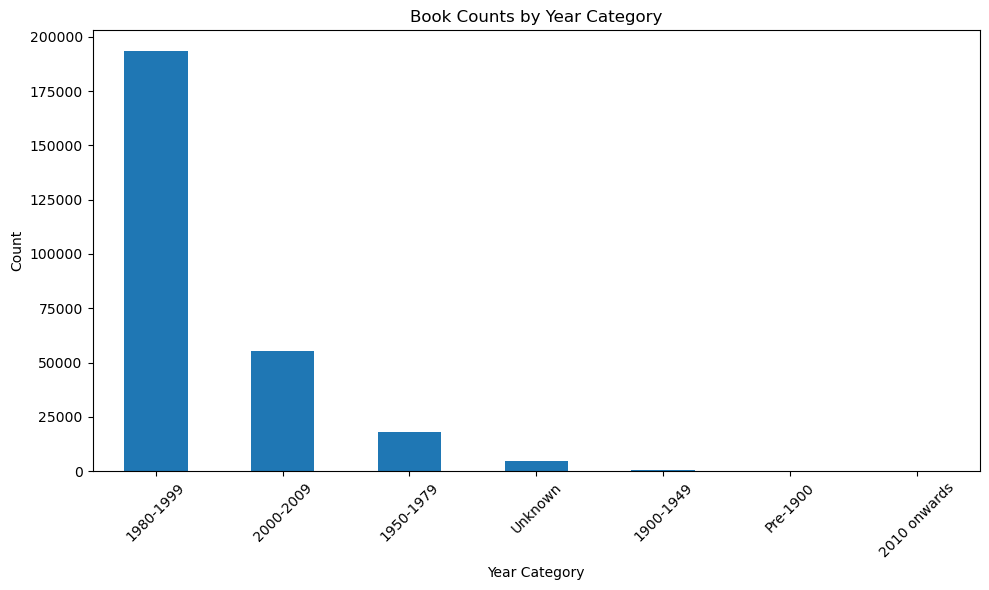

In [40]:
#creating a bar chart to see which bins have the highest count
year_counts = books_df['Year_Category'].value_counts()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Book Counts by Year Category')
plt.xlabel('Year Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis of Book Year Categories** 

- Peak Period: 1980-1999
This period has the highest book count, indicating a significant boom in publishing.

- Second Highest: 2000-2009
Counts here are about 1/4 of the previous decade, suggesting a decline in volume.

- Data Quality Issues
Unknown Years (Year 0): A large number of books lack publication years, which may skew analysis.

**Underrepresented Periods:**

- Pre-1900: Only 8 books

- 2010 onwards: Only 7 books

These low counts could lead to unreliable predictions and biased recommendations.

**Implications for Modeling**
- Data Imbalance: Models may favor the 1980-1999 period due to higher counts.

- Limited Recent Data: Few books from 2010 onwards may hinder contemporary recommendations.

- Historical Blind Spots: Scarcity of pre-1900 books limits insights into classic literature.

In [41]:
# Sanity check
((books_df.isna().sum()/books_df.shape[0])*100).sort_values(ascending=False)

ISBN                0.0
Title               0.0
Author              0.0
Publisher           0.0
Publication_year    0.0
Year_Category       0.0
Image_URL           0.0
dtype: float64

We have cleaned and done some prepricessing for out books data, now let's looking to the ratings data. 

<a id="ratings-data"></a>
### Ratings Data
[Back to Table of Contents](#table-of-content)

In [42]:
# Looking into the first 5 rows of the dataset
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


At a first glance we can see that we have the user ID, the ISBN number and the rating that each user gave to the a perticular book refrenced by the ISBN number here.

In [43]:
# Looking at the shape of the books data
ratings_df.shape
print(f"We have {ratings_df.shape[0]} rows and {ratings_df.shape[1]} columns in the books dataset")

We have 1149780 rows and 3 columns in the books dataset


In [44]:
# looking into the columsn of the ratings data 
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [45]:
# Seeing if the books dataset has any duplicated rows 
ratings_df.duplicated().sum()

np.int64(0)

In [46]:
# Renaming column
ratings_df.rename(columns={'User-ID': 'User_id', 'Book-Rating': 'Ratings'}, inplace=True)

In [47]:
# checking to se eif we have any null values in out data that we need to handle 
((ratings_df.isna().sum()/ratings_df.shape[0])*100).sort_values(ascending=False)

User_id    0.0
ISBN       0.0
Ratings    0.0
dtype: float64

We can see that the data for ratings is clean and we have no duplicated rows of columns for this data. Now, lets take a deeper look into what these ratings are and how the count of each rating varies.

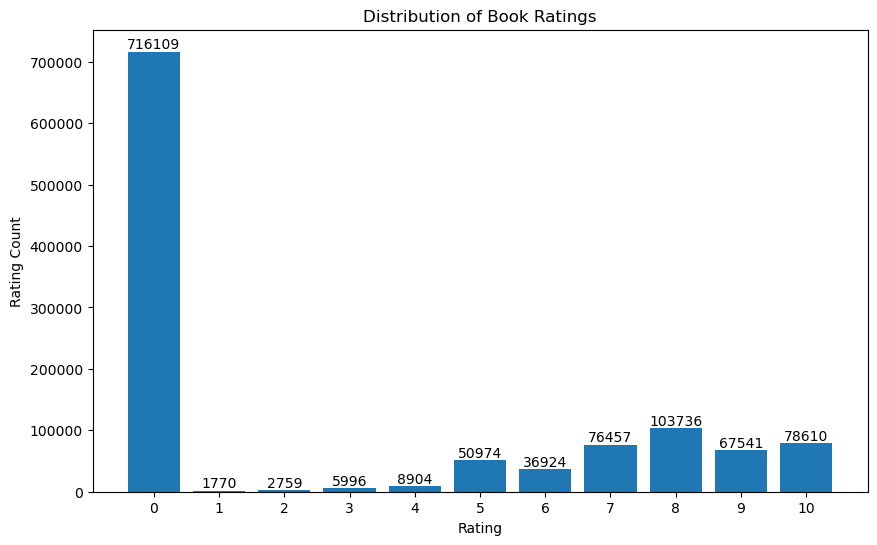

In [48]:
# Counting the occurrences of each rating
rating_counts = ratings_df['Ratings'].value_counts().sort_index()

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values)

# Customizing the graph
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.xticks(range(0, max(rating_counts.index) + 1))

# Adding value labels on top of each bar
for i, v in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], v, str(v), ha='center', va='bottom')

plt.show()

Our analysis of the rating distribution reveals significant insights into user behavior and book popularity within our dataset. The ratings span from 0 to 10, with a notable concentration at 0, representing 716,109 instances. This high count of zero ratings indicates that a substantial number of books have not received user ratings, or users have not provided feedback for many ISBNs.

Despite the prevalence of unrated items, the dataset remains valuable due to the considerable volume of ratings in the 1-10 range. A clear trend emerges: users tend to be generous in their assessments, with a higher frequency of ratings in the 5-10 range compared to 1-4. This skew towards positive ratings suggests an overall satisfaction with the books or a potential bias towards favorable reviews.

Particularly noteworthy is the peak at rating 8, which stands out as the most common non-zero rating. This preference for high scores, especially 8, indicates a strong positive sentiment among active users. The distribution pattern provides crucial insights for our recommendation system, highlighting the importance of considering this positive bias in our model development and interpretation of user preferences.

In [49]:
print(f'The mean global rating: {round(ratings_df['Ratings'].mean(), 2)}')

The mean global rating: 2.87


In [50]:
mean_rating = ratings_df.groupby('User_id')['Ratings'].mean()
print(f'Mean ratings per user: {round(mean_rating.mean(), 2)}')

Mean ratings per user: 4.39


In [51]:
# Counting the number of books rated by each user
user_rating_counts = ratings_df.groupby('User_id')['Ratings'].count()

# Getting some basic statistics
print("\nStatistics of books rated per user:")
print(user_rating_counts.describe())

# To see users who rated the most books
print("\nTop 10 users who rated the most books:")
print(user_rating_counts.sort_values(ascending=False).head(10))


Statistics of books rated per user:
count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: Ratings, dtype: float64

Top 10 users who rated the most books:
User_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: Ratings, dtype: int64


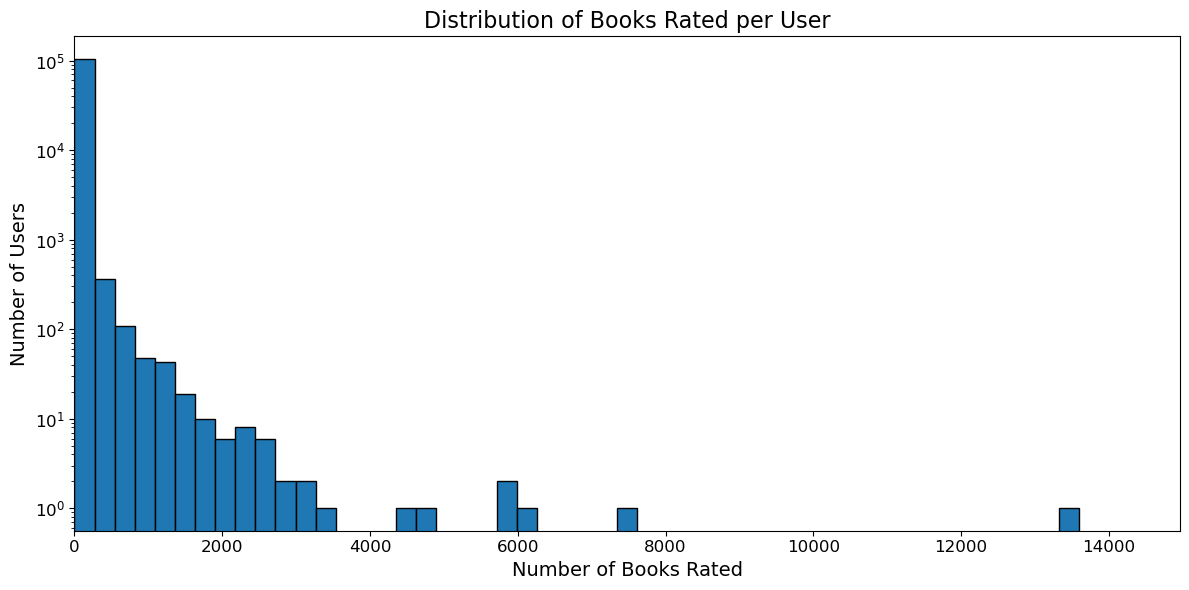

In [52]:
# Ploting a distrubtion of books rated per user 
plt.figure(figsize=(12, 6))
plt.hist(user_rating_counts, bins=50, edgecolor='black')
plt.title('Distribution of Books Rated per User', fontsize=16)
plt.xlabel('Number of Books Rated', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding some padding to the x-axis to reduce squeezing
plt.xlim(0, user_rating_counts.max() * 1.1)

# Using log scale for y-axis to better show the distribution
plt.yscale('log')

plt.tight_layout()
plt.show()

Our analysis of user rating behavior reveals a significant skew towards minimal engagement. The graph illustrates a clear inverse relationship between the number of books rated and the number of users providing those ratings. This distribution is heavily weighted towards users who have rated only a single book, with a sharp decline in user numbers as the rating count increases.

This pattern indicates that the majority of users in our dataset are not highly active in providing ratings, suggesting a low level of sustained engagement with the rating system. As we move along the x-axis, representing an increase in the number of books rated, we observe a consistent decrease in the number of users, forming a long-tail distribution.

This insight is crucial for our recommendation system development, particularly when considering collaborative filtering approaches. Collaborative filtering relies on user interactions and preferences to generate recommendations. The effectiveness of this method could be limited by the predominance of users with minimal rating activity.

For our model development:
1. We may need to focus on the more active subset of users to build robust user profiles.
2. We should consider implementing techniques to address the cold-start problem for new or infrequent users.
3. Hybrid approaches combining collaborative filtering with content-based methods might be necessary to provide reliable recommendations across our user base.

Understanding this user behavior is essential for tailoring our recommendation strategy and setting realistic expectations for model performance, especially in scenarios with limited user interaction data.

<a id="merging-datasets"></a>
### Methodology

Having refined our books and ratings datasets, we now proceed to consolidate this information into a single, comprehensive dataset. This merger will streamline our analysis process and provide a more holistic view of our data.

We'll use the ISBN (International Standard Book Number) as the key for this integration. The ISBN serves as a unique identifier for each book, ensuring accurate matching between the two datasets. This universal code is ideal for our purposes, as it's consistently used across the publishing industry and our datasets

In [53]:
# Merging the book and ratiungs data on ISBN 
ratings_with_books = ratings_df.merge(books_df, on='ISBN')

In [54]:
# Looking at the top 5 rows of the merged dataframe 
ratings_with_books.head()

,User_id,ISBN,Ratings,Title,Author,Publisher,Publication_year,Year_Category,Image_URL
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002,2000-2009,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,Heinle,2001,2000-2009,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,1996,1980-1999,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,Cambridge University Press,1999,1980-1999,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,Cambridge University Press,2001,2000-2009,http://images.amazon.com/images/P/0521795028.0...


In [55]:
# Looking at the shape of our new data
ratings_with_books.shape
print(f"We have {ratings_with_books.shape[0]} rows and {ratings_with_books.shape[1]} columns in the merged dataset")

We have 1031128 rows and 9 columns in the merged dataset


In [56]:
# Looking at the null values in the column to see which columns have the most null values
ratings_with_books.isnull().sum().sort_values(ascending=False)

User_id             0
ISBN                0
Ratings             0
Title               0
Author              0
Publisher           0
Publication_year    0
Year_Category       0
Image_URL           0
dtype: int64

In [57]:
ratings_with_books.duplicated().sum()

np.int64(0)

We can see that we have no null values of duplicated rows in the in the merged dataframe as we already clean both the data.

In [58]:
# Quick overview of the top top most rated Books 
ratings_with_books['Title'].value_counts()[0:10]

Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: count, dtype: int64

To enhance our merged dataframe's informativeness, we'll perform additional aggregations, providing a more comprehensive view of our data. Our first focus is on determining the total number of ratings for each book. This aggregation will offer valuable insights into book popularity and user engagement.

We'll use a groupby operation on the book titles to account for potential duplicates, such as multiple editions of popular series like Harry Potter. This approach ensures we capture the total number of ratings across all instances of a unique title, rather than treating each ISBN as a separate entity.

By aggregating ratings at the title level, we'll gain a clearer picture of which books are truly the most popular or highly rated in our dataset. This information will be crucial for understanding user preferences and potentially identifying trending or influential books within our collection. Such insights will be invaluable as we progress towards developing our recommendation system, helping us to better understand the dynamics of user engagement with different titles. 

In [59]:
# Finding the rating per title 
rating_per_title = ratings_with_books.groupby('Title')['Ratings'].count().reset_index()

In [60]:
# Renaming columns
rating_per_title.rename(columns={'Ratings': 'Total_num_of_ratings'}, inplace=True)

In [61]:
rating_per_title.sort_values(by='Total_num_of_ratings', ascending=False)

,Title,Total_num_of_ratings
234945,Wild Animus,2502
196321,The Lovely Bones: A Novel,1295
183568,The Da Vinci Code,898
5303,A Painted House,838
199232,The Nanny Diaries: A Novel,828
...,...,...
58741,El Patito Feo / The Ugly Duckling - Libro y Ca...,1
155210,Scenes from Postmodern Life (Cultural Studies ...,1
155209,Scenes from Deep Time: Early Pictorial Represe...,1
155208,Scenes from American life;: Contemporary short...,1


Now let's merge the above data into our ratings with books data 

In [62]:
# merging the datasets to have total num of ratings per title 
ratings_with_books = ratings_with_books.merge(rating_per_title, on='Title')

In [63]:
# Seeing the shaoe of the merged data 
ratings_with_books.shape
print(f"We have {ratings_with_books.shape[0]} rows and {ratings_with_books.shape[1]} columns in the merged dataset")

We have 1031128 rows and 10 columns in the merged dataset


Building upon our previous analysis of total ratings per book, we'll now focus on calculating the average rating for each title. This approach provides a more nuanced perspective on book popularity and user satisfaction.

By using the groupby operation on book titles and computing the mean rating, we can identify which books are not just frequently rated, but also highly regarded by readers. This average rating metric offers insight into the overall reception of each book, balancing out the potential bias that could come from looking at total ratings alone.

In [64]:
# Finding the average ratings per title
avg_ratings = ratings_with_books.groupby('Title')['Ratings'].mean().round(2).reset_index()
avg_ratings

,Title,Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
...,...,...
241060,Ã?Â?lpiraten.,0.00
241061,Ã?Â?rger mit Produkt X. Roman.,5.25
241062,Ã?Â?sterlich leben.,7.00
241063,Ã?Â?stlich der Berge.,2.67


In [65]:
# Renaming column
avg_ratings.rename(columns={'Ratings': 'Avg_ratings'}, inplace=True)

Similar to the above lets now merge this averge ratings into our ratings with books dataset 

In [66]:
# merging the datasets to have ave num of ratings per title 
ratings_with_books = ratings_with_books.merge(avg_ratings, on='Title')

In [67]:
# reordering columns in the dataset
ratings_with_books = ratings_with_books[['ISBN', 'Title', 'Author', 'Publisher', 'Publication_year', 'Year_Category', 
                                         'User_id', 'Ratings', 'Total_num_of_ratings', 'Avg_ratings', 'Image_URL']]

In [68]:
# Seeing how the dataset looks
ratings_with_books.head()

,ISBN,Title,Author,Publisher,Publication_year,Year_Category,User_id,Ratings,Total_num_of_ratings,Avg_ratings,Image_URL
0,034545104X,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,2002,2000-2009,276725,0,60,2.93,http://images.amazon.com/images/P/034545104X.0...
1,0155061224,Rites of Passage,Judith Rae,Heinle,2001,2000-2009,276726,5,14,1.71,http://images.amazon.com/images/P/0155061224.0...
2,0446520802,The Notebook,Nicholas Sparks,Warner Books,1996,1980-1999,276727,0,650,3.56,http://images.amazon.com/images/P/0446520802.0...
3,052165615X,Help!: Level 1,Philip Prowse,Cambridge University Press,1999,1980-1999,276729,3,1,3.00,http://images.amazon.com/images/P/052165615X.0...
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,Cambridge University Press,2001,2000-2009,276729,6,1,6.00,http://images.amazon.com/images/P/0521795028.0...


We have now merged the books and ratings data and have added a few more insights into this dataframe such as the total number of ratiungs per title and the average rating per title to provide us with a more holistic understanding. Now let's looking into the uers data.

<a id="users-data"></a>
### Users Data
[Back to Table of Contents](#table-of-content)

In [69]:
# Seeing the first 5 rows of the users data
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


At first glance we can see the the users data has the users information such as the users id, loction and the age. We can also see that we have a few missing values in the users age column and that the location is all in one column as city, state, country.

In [70]:
# Looking at the shape of the books data
users_df.shape
print(f"We have {users_df.shape[0]} rows and {users_df.shape[1]} columns in the books dataset")

We have 278858 rows and 3 columns in the books dataset


In [71]:
# Columns of the df 
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [72]:
# Renaming column
users_df.rename(columns={'User-ID': 'User_id'}, inplace=True)

In [73]:
# Seeing if the books dataset has any duplicated rows 
users_df.duplicated().sum()

np.int64(0)

In [74]:
# Checking for percentage null values 
((users_df.isna().sum()/users_df.shape[0])*100).sort_values(ascending=False)

Age         39.719857
User_id      0.000000
Location     0.000000
dtype: float64

Our analysis of missing values reveals a significant challenge with the 'age' column, where 39.7% of the data is null. This presents a more complex data quality issue compared to our previous encounters with missing values.

Unlike earlier instances where we could afford to drop a small percentage of incomplete rows, eliminating 40% of our dataset would result in an unacceptable loss of valuable information. Such a drastic reduction could severely impact the integrity and representativeness of our analysis and any subsequent modeling efforts.

Given the importance of age data in understanding user demographics and potentially in tailoring book recommendations, we need to explore alternative strategies for handling these missing values.

In [75]:
# Mean of age 
print(f'The mean age of users is {users_df['Age'].mean()}')

The mean age of users is 34.75143370454978


In [76]:
# median of age 
print(f'The median age of the users is {users_df['Age'].median()}')

The median age of the users is 32.0


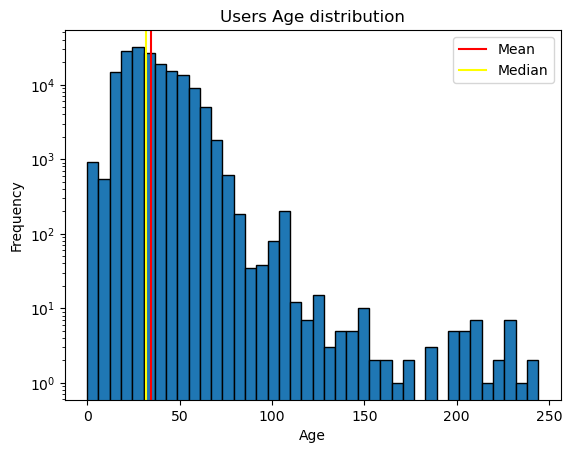

In [77]:
# Creating a histogram
users_df['Age'].hist(bins=40, edgecolor='black', log=True)

# Customizing the plot
plt.title('Users Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(users_df['Age'].mean(), color = "red", label='Mean')
plt.axvline(users_df['Age'].median(), color = "yellow", label='Median')
plt.legend(loc = 'upper right')
plt.grid()

# Displaying the plot
plt.show()

Our analysis of the age distribution reveals several critical insights and data quality issues that require attention before we address the null values:
- Distribution Skew: The frequency distribution of user ages is heavily right-skewed, with a concentration towards lower ages. This skew significantly impacts the mean age, potentially providing a misleading central tendency measure.
- Implausible Age Range: The dataset includes ages ranging from 0 to 250 years, which is clearly impossible and indicates the presence of erroneous data. Human lifespans don't extend anywhere near 250 years, and typical reading ages start around 5-6 years old.
- Data Cleaning Priority: Before we tackle the null values, it's crucial to address these misleading and impossible age entries. Correcting or removing these anomalies will provide a more accurate foundation for subsequent analysis and for dealing with missing values.

In [78]:
# Filtering the df for extreme values values 
df_age = users_df[(users_df['Age'] >= 100) | ((users_df['Age'] >= 0)& (users_df['Age'] <= 5))]
df_age

,User_id,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
...,...,...,...
277075,277076,"batam, riau, indonesia",3.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0
277908,277909,"phoenix, arizona, usa",2.0


We see that we have about 1281 rows where the age is above 100 and between 0-5. These are the extreme and unrealistoc values in the data

Given the significant number of rows with unrealistic age values, we need a more nuanced approach to data correction than simple mean or median imputation. Our goal is to preserve the general distribution of ages while addressing the extreme values in a way that maintains some semblance of their original range.

To achieve this, we'll implement a two-step process:

1. For ages below 6 years:
   We'll calculate the median age for the 6-12 year range and use this as a replacement value. This approach ensures that these younger entries remain in the lower age bracket, maintaining a more realistic representation of young readers.

2. For ages above 110 years:
   We'll compute the median age for the 80-99 year range and apply this to all entries above 99. This method keeps the older age entries within a plausible upper range without artificially inflating the overall age distribution.

This strategy offers several advantages:
- It preserves the general shape of the age distribution.
- It avoids the pitfalls of using overall mean or median, which could skew the data unrealistically.
- It maintains a more accurate representation of age groups, crucial for age-based analysis in our recommendation system.

By implementing this method, we create a more reliable age dataset that better reflects realistic reading demographics, providing a solid foundation for our subsequent analyses and model development.

In [79]:
# Defining median ages for the replacement
median_ages = {
    (6, 12): users_df[(users_df['Age'] >= 6) & (users_df['Age'] <= 12)]['Age'].median(),  # Median for 6-12
    (80, 99): users_df[(users_df['Age'] >= 80) & (users_df['Age'] <= 99)]['Age'].median()  # Median for 80-99
}

# Function to assign median age based on original age
def assign_median_age(age):
    if 0 <= age <= 5:
        return median_ages[(6, 12)]  # Replace with median of ages 6-12
    elif 110 <= age <= 250:
        return median_ages[(80, 99)]  # Replace with median of ages 80-99
    else:
        return age  # Keep the original age if it's not in the extreme ranges

# Applying the function to replace extreme ages
users_df['Age'] = users_df['Age'].apply(assign_median_age)

# Printing the updated DataFrame or summary
print(users_df['Age'].describe())

count    168096.000000
mean         34.761321
std          14.013046
min           6.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         109.000000
Name: Age, dtype: float64


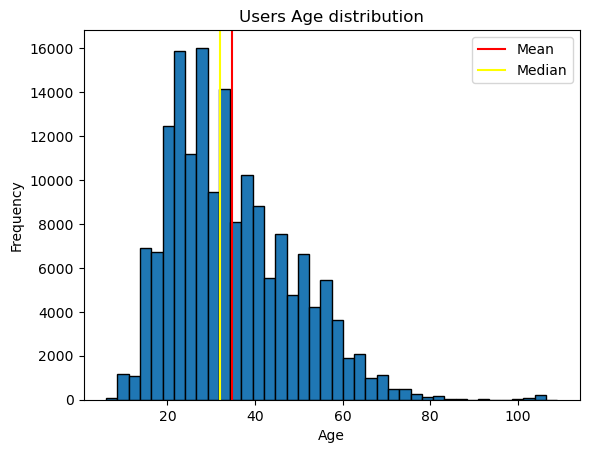

In [80]:
# Creating a histogram
users_df['Age'].hist(bins=40, edgecolor='black')

# Customizing the plot
plt.title('Users Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(users_df['Age'].mean(), color = "red", label='Mean')
plt.axvline(users_df['Age'].median(), color = "yellow", label='Median')
plt.legend(loc = 'upper right')
plt.grid()

# Displaying the plot
plt.show()

We see above that after dealing with the extreme cases, we still have a similar underlying distrubution for the age as we did before.

In [81]:
# median of age 
print(f'The median age of the users is {users_df['Age'].median()}')

The median age of the users is 32.0


To address the null values in our age column, we'll employ a more sophisticated approach than simple mean or median imputation. Our strategy aims to maintain the overall distribution of ages while filling in the missing data points.

We've observed that the interquartile range (IQR) of our age data spans from 24 to 44 years, representing the 25th to 75th percentiles of our non-null age values. This range captures a significant portion of our user base and provides a realistic spectrum of ages for imputation.

Our approach will be to randomly assign ages within this 24-44 range to the null values. This method offers several advantages:

1. It avoids artificially concentrating data around a single point (as would happen with mean or median imputation).
2. It preserves the general shape of our age distribution.
3. It introduces a controlled amount of variability, which is more reflective of real-world age distributions.

By randomly assigning ages within this range, we'll slightly alter the distribution, but in a way that's more robust and realistic than centralized imputation methods. This approach will help maintain the integrity of our age-related analyses and ensure that our recommendation system doesn't overly bias towards a single age point.

It's important to note that while this method provides a reasonable solution, it's still an approximation. We should be transparent about this imputation in our future analyses and consider sensitivity analyses to understand how this imputation might affect our results.

In [82]:
# Get the number of null values in the 'Age' column
num_nulls = users_df['Age'].isnull().sum()

# Generate random integers between 24 and 44 (inclusive) for the null values
random_ages = np.random.randint(24, 45, size=num_nulls)

# Fill the null values with the random ages
users_df.loc[users_df['Age'].isnull(), 'Age'] = random_ages

# Verify the changes
print(users_df['Age'].describe())  # Check the distribution

count    278858.000000
mean         34.441063
std          11.535783
min           6.000000
25%          26.000000
50%          33.000000
75%          41.000000
max         109.000000
Name: Age, dtype: float64


In [83]:
# Checking for null values 
((users_df.isna().sum()/users_df.shape[0])*100).sort_values(ascending=False) 

User_id     0.0
Location    0.0
Age         0.0
dtype: float64

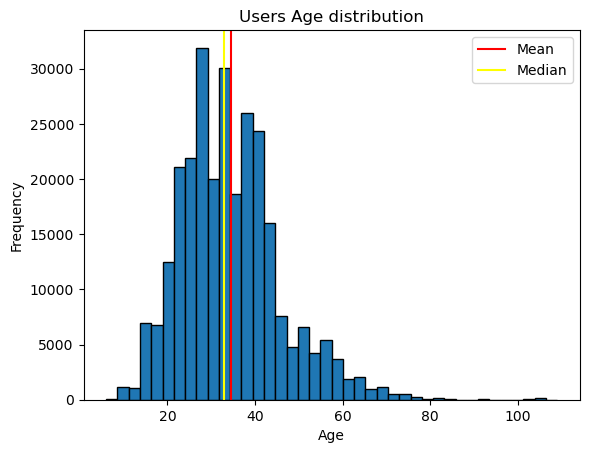

In [84]:
# Create a histogram
users_df['Age'].hist(bins=40, edgecolor='black')

# Customize the plot
plt.title('Users Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(users_df['Age'].mean(), color = "red", label='Mean')
plt.axvline(users_df['Age'].median(), color = "yellow", label='Median')
plt.legend(loc = 'upper right')
plt.grid()

# Display the plot
plt.show()

We can see that once we have solutioned for the null values there are still some ages that have a higher frequency, however, the underlying distrubition still looks similar. 

Now, let's also put the age ranges in bins as this will help us better understand and utilize the age data in our recommendation system. Categorizing ages into bins offers several advantages:

1. Simplification: It reduces the granularity of the data, making patterns easier to identify and analyze.

2. Generalization: It allows our model to make more generalized recommendations based on age groups rather than specific ages.

3. Handling Outliers: Binning can mitigate the impact of extreme values or outliers in the age data.

4. Feature Engineering: Age categories can be used as features in our recommendation model, potentially improving its performance.

5. Marketing Insights: It enables more targeted analysis of reading preferences across different age groups.

6. User Segmentation: Age bins facilitate easier segmentation of users for personalized recommendations.

By implementing these age categories, we create a more robust framework for our recommendation system. It will allow us to identify trends in reading preferences across different life stages and tailor our recommendations accordingly. This approach can lead to more accurate and relevant book suggestions, enhancing the overall user experience of our recommendation platform.

In [85]:
# Defining bin edges based on the distribution of ages
bins = [0, 18, 26, 33, 41, 60, np.inf]

# Defining labels for the bins
labels = ['Under 18', '18-25', '26-32', '33-40', '41-60', '60+']

# Applying the binning to the 'Age' column
users_df['Age_Category'] = pd.cut(users_df['Age'], bins=bins, labels=labels, include_lowest=True)

In [86]:
# seeign the top 5 rows of the dataset
users_df.head()

,User_id,Location,Age,Age_Category
0,1,"nyc, new york, usa",30.0,26-32
1,2,"stockton, california, usa",18.0,Under 18
2,3,"moscow, yukon territory, russia",36.0,33-40
3,4,"porto, v.n.gaia, portugal",17.0,Under 18
4,5,"farnborough, hants, united kingdom",24.0,18-25


In [87]:
# seeinng the valu counts for the Age Category 
users_df['Age_Category'].value_counts()

Age_Category
26-32       72075
33-40       70907
41-60       56301
18-25       55493
Under 18    16013
60+          8069
Name: count, dtype: int64

Lastly, let's clean up the location column by splitting it into separate columns for city, state, and country. This refinement will:

1. Enable more detailed geographical analysis
2. Improve our model's ability to make location-based recommendations
3. Allow for better user segmentation and personalization
4. Facilitate easier regional comparisons of reading preferences
5. Support potential future features like local bestseller lists or region-specific recommendations

This granular approach to location data will enhance both our analytical capabilities and the precision of our book recommendation system.

In [88]:
# Split the Location column, allowing for missing values
split_location = users_df['Location'].str.split(',', expand=True)

# Ensure we have 3 columns, filling missing values with NaN
split_location = split_location.reindex(columns=range(3))

# Assign names to the columns
users_df[['City', 'State', 'Country']] = split_location

# Clean up the columns
users_df['City'] = users_df['City'].str.strip()
users_df['State'] = users_df['State'].str.strip()
users_df['Country'] = users_df['Country'].str.strip()

# Handle special cases and replace null values with 'Unknown'
users_df['Country'] = users_df['Country'].replace({'usa': 'United States', 'n/a': 'Unknown', 'nan': 'Unknown', '': 'Unknown'})
users_df['State'] = users_df['State'].replace({'n/a': 'Unknown', 'nan': 'Unknown', '': 'Unknown'})

# Replace any remaining NaN values with 'Unknown'
users_df['City'] = users_df['City'].fillna('Unknown')
users_df['State'] = users_df['State'].fillna('Unknown')
users_df['Country'] = users_df['Country'].fillna('Unknown')

# Drop the original Location column if not needed
users_df = users_df.drop('Location', axis=1)

In [89]:
# seeing the top 5 columns of the data 
users_df.head()

,User_id,Age,Age_Category,City,State,Country
0,1,30.0,26-32,nyc,new york,United States
1,2,18.0,Under 18,stockton,california,United States
2,3,36.0,33-40,moscow,yukon territory,russia
3,4,17.0,Under 18,porto,v.n.gaia,portugal
4,5,24.0,18-25,farnborough,hants,united kingdom


In [90]:
# Checking for null values 
((users_df.isna().sum()/users_df.shape[0])*100).sort_values(ascending=False)

User_id         0.0
Age             0.0
Age_Category    0.0
City            0.0
State           0.0
Country         0.0
dtype: float64

We now have a clean data for the users dataframe.

<a id="final-dataset"></a>
## Final Dataset Analysis
[Back to Table of Contents](#table-of-content)

With data cleaning complete, let's combine everything into a single dataframe. This will streamline analysis and modeling by centralizing all our refined data.

In [91]:
# Merging the users data with the ratings with books data
final_df = users_df.merge(ratings_with_books, on='User_id')

In [92]:
# Seeing the first 5 rows of the data 
final_df.head()

,User_id,Age,Age_Category,City,State,Country,ISBN,Title,Author,Publisher,Publication_year,Year_Category,Ratings,Total_num_of_ratings,Avg_ratings,Image_URL
0,2,18.0,Under 18,stockton,california,United States,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,2002,2000-2009,0,2,3.50,http://images.amazon.com/images/P/0195153448.0...
1,8,38.0,33-40,timmins,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,2001,2000-2009,5,14,4.93,http://images.amazon.com/images/P/0002005018.0...
2,8,38.0,33-40,timmins,ontario,canada,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,1991,1980-1999,0,3,5.00,http://images.amazon.com/images/P/0060973129.0...
3,8,38.0,33-40,timmins,ontario,canada,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,1999,1980-1999,0,11,4.27,http://images.amazon.com/images/P/0374157065.0...
4,8,38.0,33-40,timmins,ontario,canada,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,1999,1980-1999,0,1,0.00,http://images.amazon.com/images/P/0393045218.0...


In [93]:
# reordering columns in the dataset and removing the age column as we already have the age catergory column 
final_df  = final_df[['ISBN', 'Title', 'Author', 'Ratings', 'Total_num_of_ratings', 'Avg_ratings', 'Publisher',
                        'Publication_year','Year_Category', 'User_id', 'Age_Category', 'City', 'State', 'Country', 'Image_URL']]

In [94]:
# Seeing the first 5 rows of the data 
final_df.head()

,ISBN,Title,Author,Ratings,Total_num_of_ratings,Avg_ratings,Publisher,Publication_year,Year_Category,User_id,Age_Category,City,State,Country,Image_URL
0,0195153448,Classical Mythology,Mark P. O. Morford,0,2,3.50,Oxford University Press,2002,2000-2009,2,Under 18,stockton,california,United States,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,5,14,4.93,HarperFlamingo Canada,2001,2000-2009,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,0,3,5.00,HarperPerennial,1991,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,0,11,4.27,Farrar Straus Giroux,1999,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0,1,0.00,W. W. Norton &amp; Company,1999,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0393045218.0...


In [95]:
# Seeing if there are any duplicates in the data 
final_df.duplicated().sum()

np.int64(0)

In [96]:
# Seeing the shape of the final df 
final_df.shape
print(f"We have {final_df.shape[0]} rows and {final_df.shape[1]} columns in the final dataset")

We have 1031128 rows and 15 columns in the final dataset


In [97]:
# Checking for null values 
((final_df.isna().sum()/final_df.shape[0])*100).sort_values(ascending=False) 

ISBN                    0.0
Title                   0.0
Author                  0.0
Ratings                 0.0
Total_num_of_ratings    0.0
Avg_ratings             0.0
Publisher               0.0
Publication_year        0.0
Year_Category           0.0
User_id                 0.0
Age_Category            0.0
City                    0.0
State                   0.0
Country                 0.0
Image_URL               0.0
dtype: float64

Having consolidated our cleaned user information, ratings data, and book details into a single comprehensive dataframe, we're now poised to delve deeper into our dataset. This unified view will allow us to uncover valuable insights and patterns that will inform our understanding and guide the development of our book recommendation system.

In [98]:
# saving the final dataset in the folder 
final_df.to_csv('cleaned_data.csv', index=False)

<a id="insights"></a>
## Additional Insights and Observations
[Back to Table of Contents](#table-of-content)

To enhance our data analysis, let's explore additional features to uncover deeper insights and patterns. This comprehensive examination will provide a more nuanced understanding of our dataset, potentially revealing valuable information to refine and improve our recommendation models.

In [99]:
final_df.head()

,ISBN,Title,Author,Ratings,Total_num_of_ratings,Avg_ratings,Publisher,Publication_year,Year_Category,User_id,Age_Category,City,State,Country,Image_URL
0,0195153448,Classical Mythology,Mark P. O. Morford,0,2,3.50,Oxford University Press,2002,2000-2009,2,Under 18,stockton,california,United States,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,5,14,4.93,HarperFlamingo Canada,2001,2000-2009,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,0,3,5.00,HarperPerennial,1991,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,0,11,4.27,Farrar Straus Giroux,1999,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0,1,0.00,W. W. Norton &amp; Company,1999,1980-1999,8,33-40,timmins,ontario,canada,http://images.amazon.com/images/P/0393045218.0...


<a id="Avg"></a>
#### Distribution of Average Book Ratings 

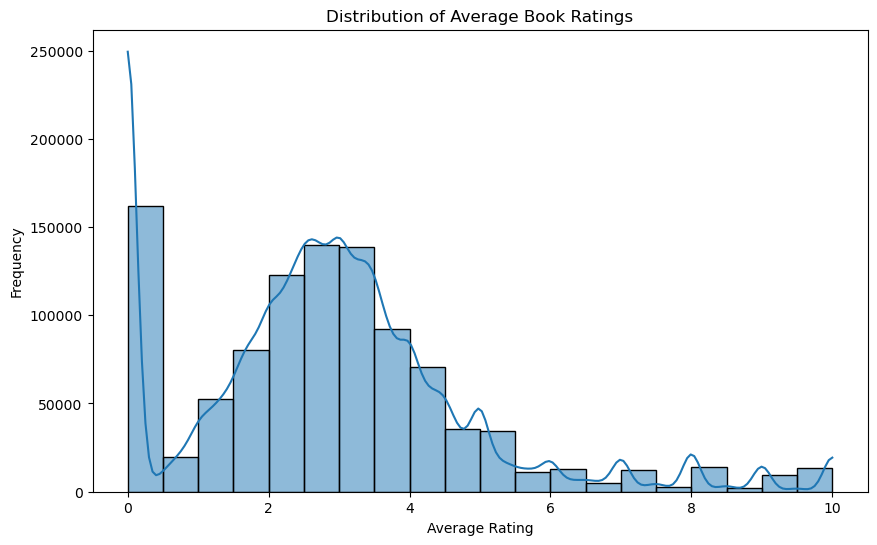

In [100]:
# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='Avg_ratings', bins=20, kde=True)
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The graph highlights a substantial portion of users without any book ratings, confirming our previous analysis that showed a peak at zero ratings. However, when we exclude these non-raters, the distribution of average ratings appears **approximately normal, with a slight Right-skewed**. The distribution **peaks around an average rating of 2.5**, and we observe minor increases at the higher end of the scale, specifically around 7.5, 8.5, and 10. These upticks at the higher end suggest that while most active users provide moderate ratings, there's a notable segment that tends to rate books more favorably. This could indicate a preference for highly-rated books or a general tendency to give positive feedback when users are engaged enough to provide a rating.

<a id="top10"></a>
#### Top 10 Countries by User Count and Age breakdown

/var/folders/x1/c4vgz1153nb7vn8f6v942wl80000gn/T/ipykernel_25844/1064569831.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Country', 'Age_Category'])


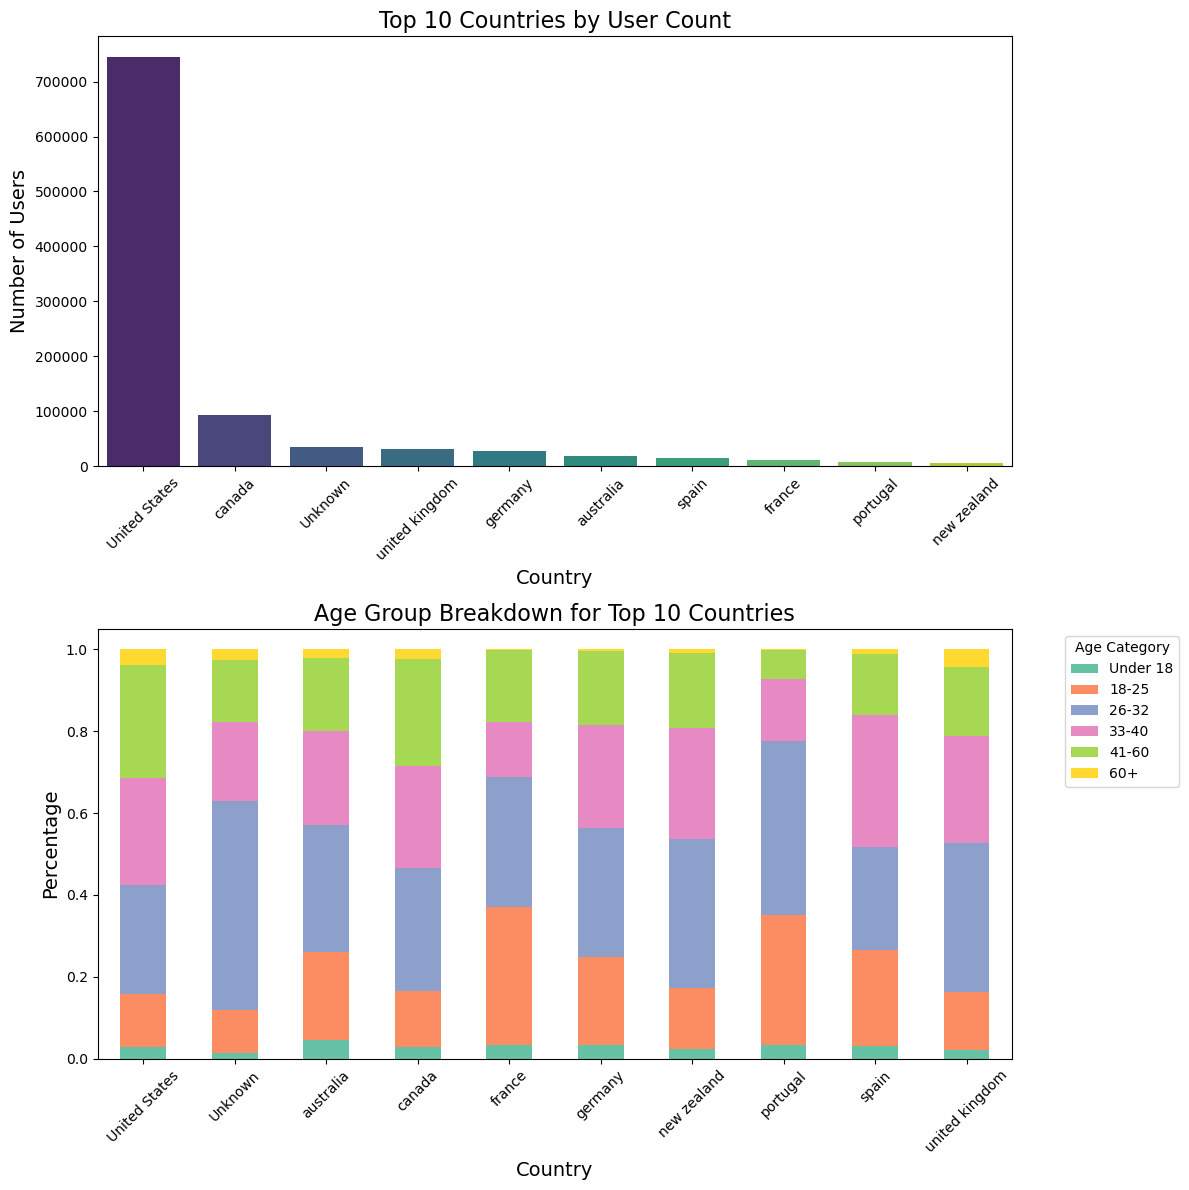

In [101]:
# Grouping the data by country and count users
country_counts = final_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'User_Count']

# Getting the top 10 countries
top_10_countries = country_counts.head(10)

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Bar chart for top 10 countries
sns.barplot(
    x='Country', 
    y='User_Count', 
    data=top_10_countries, 
    ax=ax1, 
    hue='Country',
    palette='viridis',
    legend=False
)
ax1.set_title('Top 10 Countries by User Count', fontsize=16)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Number of Users', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Age group breakdown for top 10 countries
age_breakdown = (
    final_df[final_df['Country'].isin(top_10_countries['Country'])]
    .groupby(['Country', 'Age_Category'])
    .size()
    .unstack(fill_value=0)
)

# Calculate percentage breakdown
age_breakdown_percent = age_breakdown.div(age_breakdown.sum(axis=1), axis=0)

# Using a distinct color palette for age categories
colors = sns.color_palette("Set2", n_colors=len(age_breakdown_percent.columns))

# Plotting the stacked bar chart
age_breakdown_percent.plot(kind='bar', stacked=True, ax=ax2, color=colors)

ax2.set_title('Age Group Breakdown for Top 10 Countries', fontsize=16)
ax2.set_xlabel('Country', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.legend(title='Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The graph shows the top 10 countries where our users are from, providing insights into the geographical distribution of our user base. This information is crucial for developing an effective recommendation system and understanding potential biases in our data.

**Key Observations**

1. US Dominance: The United States has the highest number of users, significantly outpacing other countries.

2. Diverse User Base: Germany, France and Portugal are among the top countries, indicating a global user distribution.

3. Language Diversity: The presence of non-English speaking countries suggests a diverse linguistic user base.

4. Age Distribution: The US and Canada show fairly even distribution across age groups from 18-60, while countries like Portugal and New Zealand have higher percentages in the 18-32 age range.

5. Low Under-18 Representation: All countries show a very low percentage of users under 18.

**Implications for Recommendation System**

1. Global Customization: Tailor recommendations based on regional preferences and availability.

2. Language Considerations: Implement multi-language support to cater to diverse linguistic user groups.

3. Age-Based Recommendations: Adjust recommendations based on age distribution patterns in different countries.

4. Bias Mitigation: Use geographical awareness to ensure fair representation for users from all countries in the recommendation algorithm.

To improve the system, consider incorporating location-based filtering, implementing strategies for users with unknown locations, and exploring collaborative filtering techniques that account for geographical and age-based similarities.

<a id="Age"></a>
#### Distribution of Users Across Age Categories

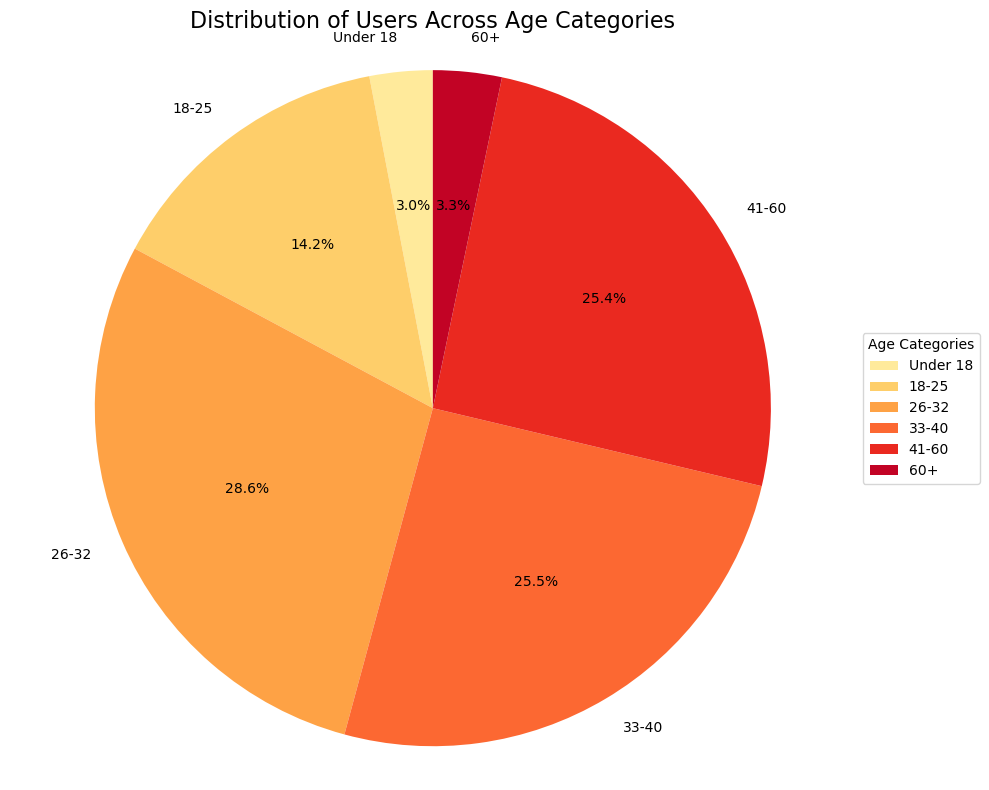

In [102]:
# Counting the number of users in each Age_Category
age_distribution = final_df['Age_Category'].value_counts()

# Defining the correct order of age categories
age_order = ['Under 18', '18-25', '26-32', '33-40', '41-60', '60+']

# Sorting the data according to this order
age_distribution = age_distribution.reindex(age_order)

# Defining a color palette
colors = sns.color_palette("YlOrRd", len(age_order))

# Creating a pie chart
plt.figure(figsize=(10, 8))
plt.pie(age_distribution.values, labels=age_distribution.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Users Across Age Categories', fontsize=16)
plt.axis('equal')

# Adding a legend
plt.legend(age_distribution.index, title="Age Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

The pie chart details the percentage of users in various age ranges, offering critical insights for optimizing our recommendation system. Understanding this distribution enables us to better cater to our user base and refine our recommendations accordingly. A key observation is the **balanced representation** among users aged 26-32, 33-40, and 41-60, indicating that these groups constitute the majority of our users. Additionally, the 15% of users in the 16-25 age range represent a significant **younger demographic** that warrants specific attention. It's also important to note the smaller percentages in the extreme age categories, which can be attributed to natural user demographics and data cleaning efforts aimed at removing unrealistic age entries, ensuring that we maintained the **integrity of the underlying data**.

These insights have several implications for our recommendation system:

*   **Core Audience Focus:** Tailor recommendations to suit the preferences of our core age groups (26-60).
*   **Youth Engagement:** Cater to the unique interests of our younger audience (16-25) through trending or youth-oriented content.
*   **Algorithm Design:** Develop algorithms that account for age-based preferences.
*   **Bias Mitigation:** Ensure diverse recommendations across all age groups to avoid age-based biases.

By leveraging this age distribution data, we can provide more personalized and relevant suggestions to users across all age ranges.

<a id="top"></a>
#### Top 10 Books by Total Number of Ratings

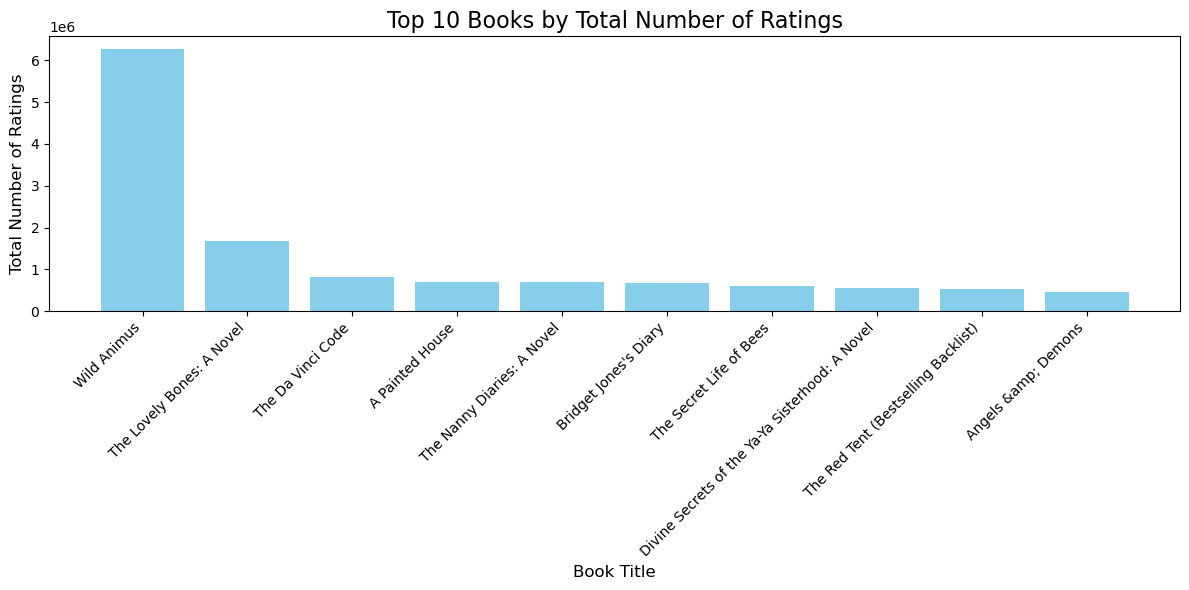

In [103]:
# Grouping by title and sum the total number of ratings
book_ratings = final_df.groupby('Title')['Total_num_of_ratings'].sum().reset_index()

# Sorting by total number of ratings in descending order and get top 5
top_5_books = book_ratings.sort_values('Total_num_of_ratings', ascending=False).head(10)

# Visualizing the results
plt.figure(figsize=(12, 6))
plt.bar(top_5_books['Title'], top_5_books['Total_num_of_ratings'], color='skyblue')
plt.title('Top 10 Books by Total Number of Ratings', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Total Number of Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Analysis of Top 10 Books by Total Number of Ratings

The graph visualizes the **top 10 books with the highest total number of ratings**. From the chart, we observe that *Wild Animus* has the most ratings, followed by other notable titles like *The Da Vinci Code* and *Bridget Jones's Diary*. While these books appear to dominate based on sheer volume of ratings, this metric alone can be misleading.

##### Statistical Concerns
1. **No Weighting for Rating Volume**: A book with only a few ratings (e.g., 5 users giving 5 stars) can appear disproportionately high in average ratings compared to a book with thousands of ratings and a slightly lower average.
2. **Bias in Popularity**: Books with more exposure or marketing tend to accumulate more ratings, which may not necessarily reflect their quality.
3. **Skewed Perception**: Relying solely on total ratings does not account for variability or reliability in the data.

##### Proposed Solution
To address these issues, we plan to implement a **weighted rating system** in the next sprint. This will adjust each book’s score by incorporating:
- **Volume of Ratings**: Books with more ratings will carry more weight.
- **Smoothing Factor**: A method will be applied to reduce the impact of outliers (e.g., books rated highly by only a few users).

##### Future Steps
1. Implement a weighted scoring algorithm.
2. Reassess the rankings using both total ratings and weighted scores.

By introducing this system, we aim to provide a more accurate representation of highly rated books, balancing popularity with reliability.


<a id="conclusion"></a>
## Conclusion and Next Steps
[Back to Table of Contents](#table-of-content)

Our comprehensive Exploratory Data Analysis (EDA) and data cleaning process have successfully transformed our initial Books, Ratings, and Users datasets into a unified, high-quality dataset primed for building a book recommendation system. Key accomplishments include:

- **Data Integration:** We've merged information from all three tables into a single, comprehensive dataset, facilitating easier analysis and model development.
- **Data Cleaning:** We've addressed missing values, corrected inconsistencies, and removed or imputed erroneous data points, particularly in the Age and Publication_year fields.
- **Feature Engineering:** We've created new features such as Total_num_of_ratings, Avg_ratings, Year_Category, and Age_Category, providing additional dimensions for our recommendation algorithms.
- **Geographical Parsing:** We've split the Location field into City, State, and Country, enabling more granular geographical analysis.
- **Data Validation:** We've ensured that all fields contain appropriate and realistic values, enhancing the reliability of our dataset.

Next Steps for Book Recommendation System Project:
- **Feature Selection and Preprocessing:** Identify and prepare the most relevant features for our recommendation algorithms, including normalization of numerical data and encoding of categorical variables.
- **NLP for Book Titles:** Apply Natural Language Processing techniques to extract meaningful features from book titles. This will include tokenization, keyword extraction, and TF-IDF analysis. These NLP-derived features will significantly enhance our content-based filtering approach.
- **Collaborative Filtering Implementation:** Develop a user-based or item-based collaborative filtering model as our baseline. This approach will leverage user-item interactions to identify similar users or books and make recommendations accordingly.
- **Content-Based Filtering Development:** Create a content-based recommendation system utilizing book attributes such as Author, Publisher, Year_Category, and the NLP features extracted from titles. This method will focus on the characteristics of the books themselves to suggest similar items.
- **Hybrid Model Exploration:** Investigate ways to combine collaborative and content-based approaches for a more robust and accurate recommendation system.

By focusing on these key steps, we'll be able to create a well-rounded book recommendation system that leverages both user behavior and book content, including NLP-derived insights from titles, to provide personalized suggestions to our users.